# K Nearest Neighbor
> 1. KNN Theory
1.1 Type of algorithm
KNN can be used for both classification and regression predictive problems. KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations  (x,y)  and would like to capture the relationship between  x  and  y . More formally, our goal is to learn a function  h:X→Y  so that given an unseen observation  x ,  h(x)  can confidently predict the corresponding output  y .

# 1.2 Distance measure
In the classification setting, the K-nearest neighbor algorithm essentially boils down to forming a majority vote between the K most similar instances to a given “unseen” observation. Similarity is defined according to a distance metric between two data points. The k-nearest-neighbor classifier is commonly based on the Euclidean distance between a test sample and the specified training samples. Let  xi  be an input sample with  p  features  (xi1,xi2,...,xip) ,  n  be the total number of input samples  (i=1,2,...,n) . The Euclidean distance between sample  xi  and  xl  is is defined as:

d^2(xi,xl)=(xi1−xl1)^2+(xi2−xl2)^2+...+(xip−xlp)^2
 
Sometimes other measures can be more suitable for a given setting and include the Manhattan, Chebyshev and Hamming distance.

# 1.3 Algorithm steps
> STEP 1: Cgoose the number K of neighbors

> STEP 2: Take the K nearest neighbors of the new data point, according to your distance metric

> STEP 3: Among these K neighbors, count the number of data points to each category

> STEP 4: Assign the new data point to the category where you counted the most neighbors

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('../input/iris/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

In [8]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
df.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
10%,15.900000,4.800000,2.500000,1.400000,0.200000
20%,30.800000,5.000000,2.700000,1.500000,0.200000
30%,45.700000,5.270000,2.800000,1.700000,0.400000
40%,60.600000,5.600000,3.000000,3.900000,1.160000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
60%,90.400000,6.100000,3.100000,4.640000,1.500000


In [11]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [13]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [15]:
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [16]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Dividing data into features and labels
> NOTE: As we can see dataset contain six columns: Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm and Species. The actual features are described by columns 1-4. Last column contains labels of samples. Firstly we need to split data into two arrays: X (features) and y (labels).

In [17]:
featured_column=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X=df[featured_column].values
Y=df['Species'].values

# Label encoding
> NOTE: As we can see labels are categorical. KNeighborsClassifier does not accept string labels. We need to use LabelEncoder to transform them into numbers. Iris-setosa correspond to 0, Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(Y)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)

# Parallel Coordinates
Parallel coordinates is a plotting technique for plotting multivariate data. It allows one to see clusters in data and to estimate other statistics visually. Using parallel coordinates points are represented as connected line segments. Each vertical line represents one attribute. One set of connected line segments represents one data point. Points that tend to cluster will appear closer together.

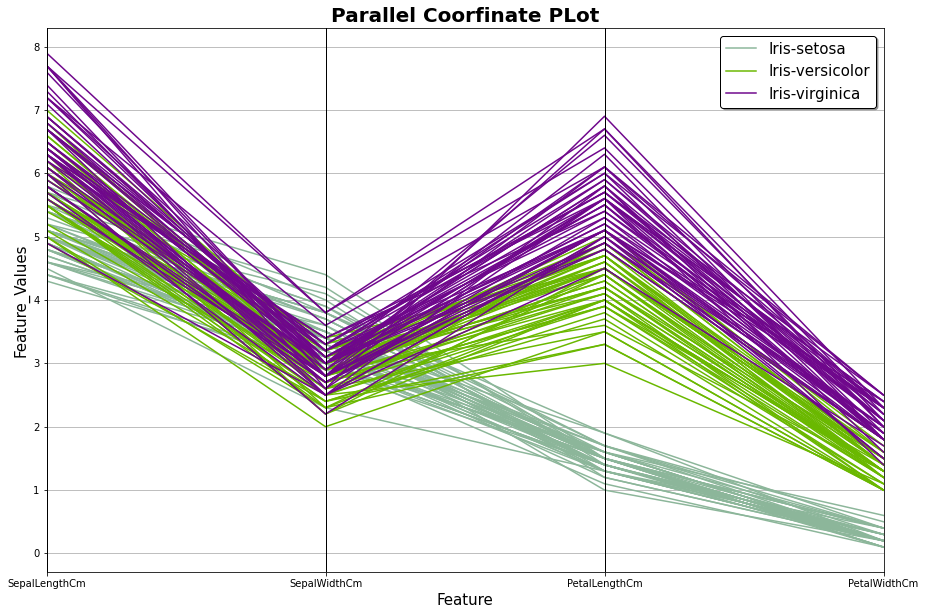

In [30]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(df.drop("Id", axis=1), "Species")
plt.title("Parallel Coorfinate PLot",fontsize=20, fontweight='bold')
plt.xlabel("Feature", fontsize=15)
plt.ylabel("Feature_Values", fontsize=15)
plt.legend(loc=1,prop={'size':15}, facecolor="white", shadow=True,edgecolor="black")
plt.show()

# Andrews Curves
Andrews curves allow one to plot multivariate data as a large number of curves that are created using the attributes of samples as coefficients for Fourier series. By coloring these curves differently for each class it is possible to visualize data clustering. Curves belonging to samples of the same class will usually be closer together and form larger structures.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:241: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(-np.pi, np.pi))


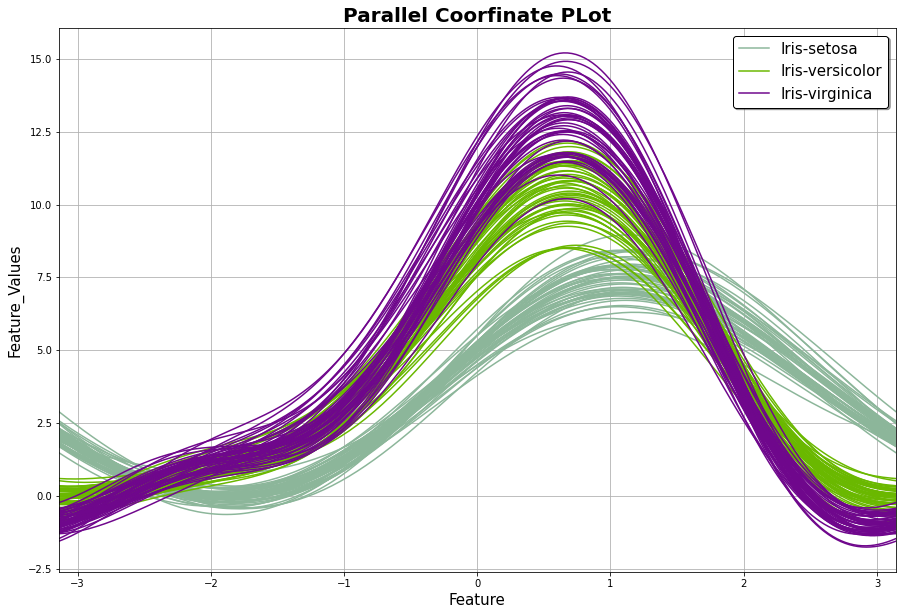

In [31]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(df.drop("Id", axis=1), "Species")
plt.title("Parallel Coorfinate PLot",fontsize=20, fontweight='bold')
plt.xlabel("Feature", fontsize=15)
plt.ylabel("Feature_Values", fontsize=15)
plt.legend(loc=1,prop={'size':15}, facecolor="white", shadow=True,edgecolor="black")
plt.show()

# Pairplot
Pairwise is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

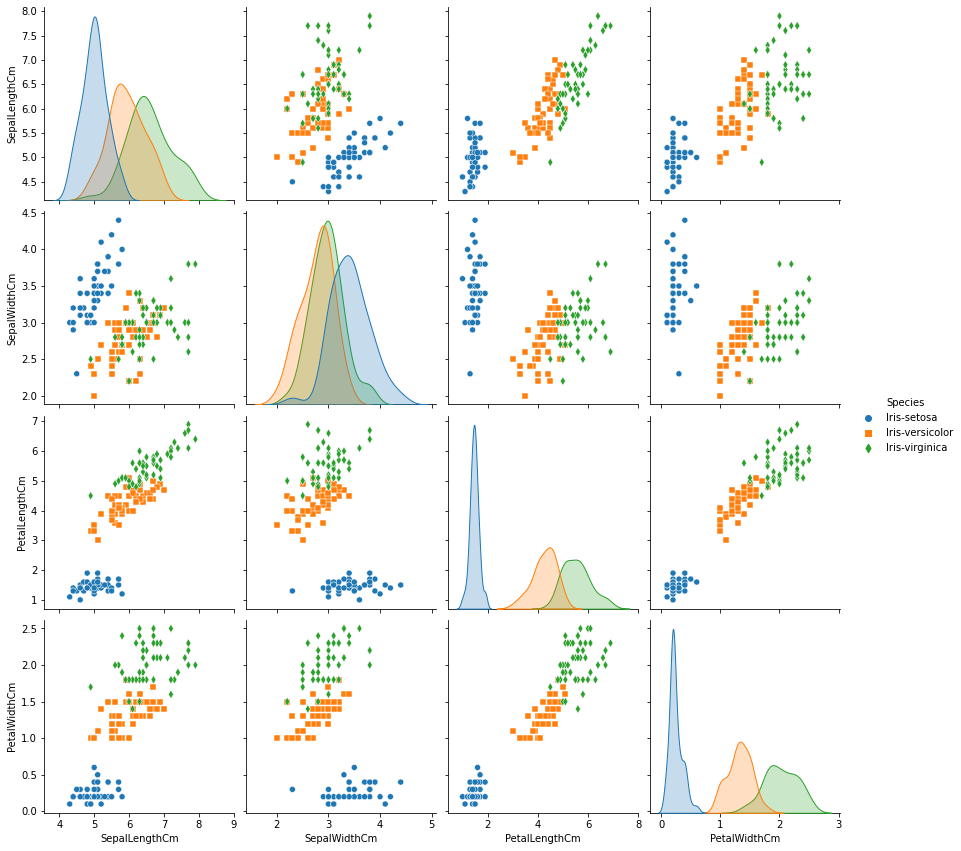

In [36]:
plt.figure()
sns.pairplot(df.drop("Id", axis=1), hue="Species", size=3,markers=["o","s","d"])
plt.show()

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<Figure size 432x288 with 0 Axes>

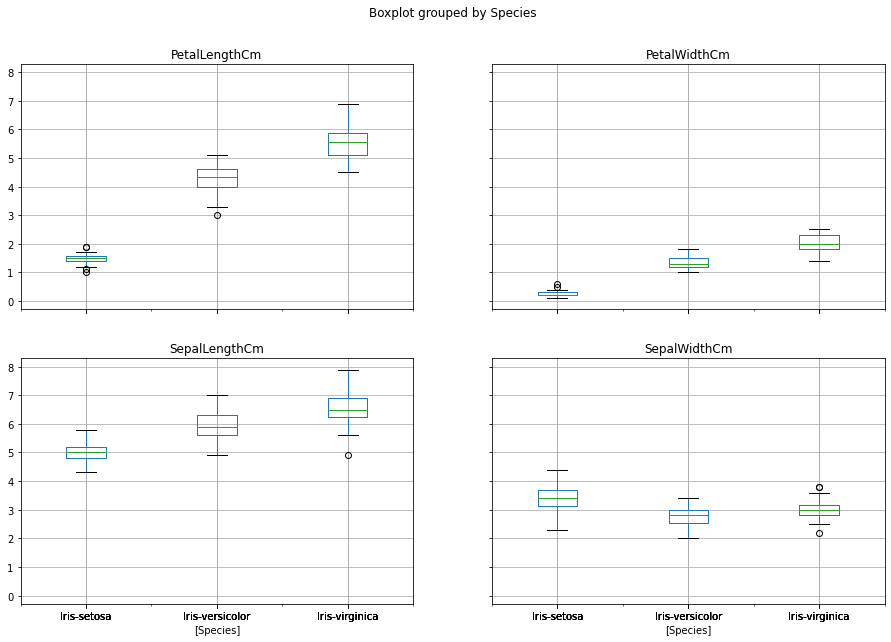

In [37]:
plt.figure()
df.drop("Id", axis=1).boxplot(by="Species",figsize=(15,10))
plt.show()

# 3D visualization
You can also try to visualize high-dimensional datasets in 3D using color, shape, size and other properties of 3D and 2D objects. In this plot I used marks sizes to visualize fourth dimenssion which is Petal Width [cm].

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


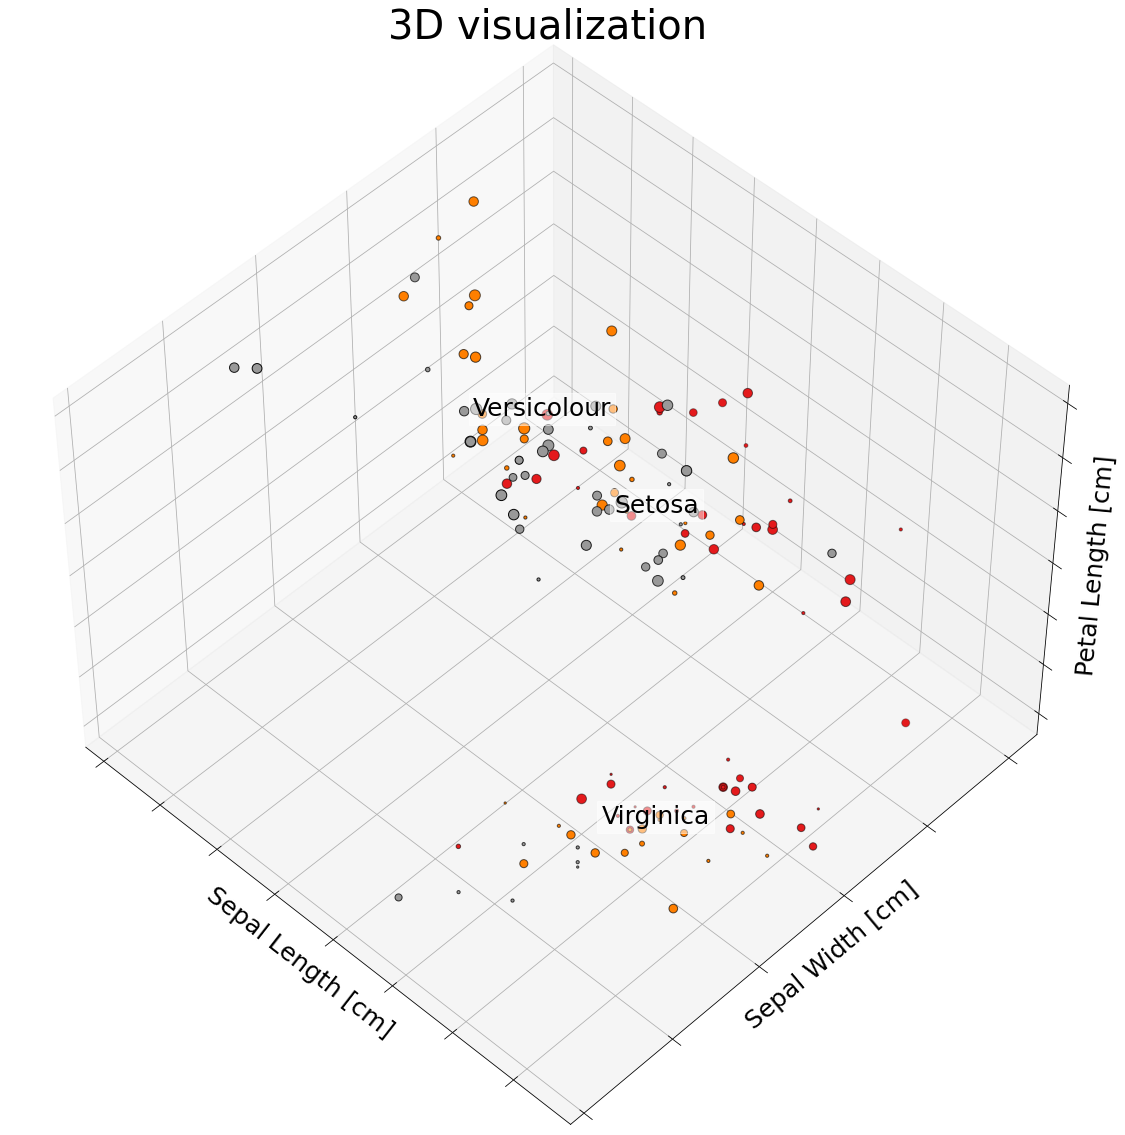

In [38]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(1,figsize=(20,15))
ax=Axes3D(fig,elev=48,azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s = X[:, 3]*50)

for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()

#  Using KNN for classification

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

#Instantiate learning model (k = 3)
classifier=KNeighborsClassifier(n_neighbors=3)

classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

# Evaluating predictions

In [40]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [43]:
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the modelis equal :"  + str(round(accuracy,2)) +  "%")


Accuracy of the modelis equal :96.67%


In [44]:
# creating list of K for KNN
k_list=list(range(1,50,2))
# creating list of cv scores
cv_score=[]
# perform 10-fold cross validation

for k in k_list:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn, X_train,y_train, cv=10,scoring='accuracy')
    cv_score.append(score.mean())

<Figure size 432x288 with 0 Axes>

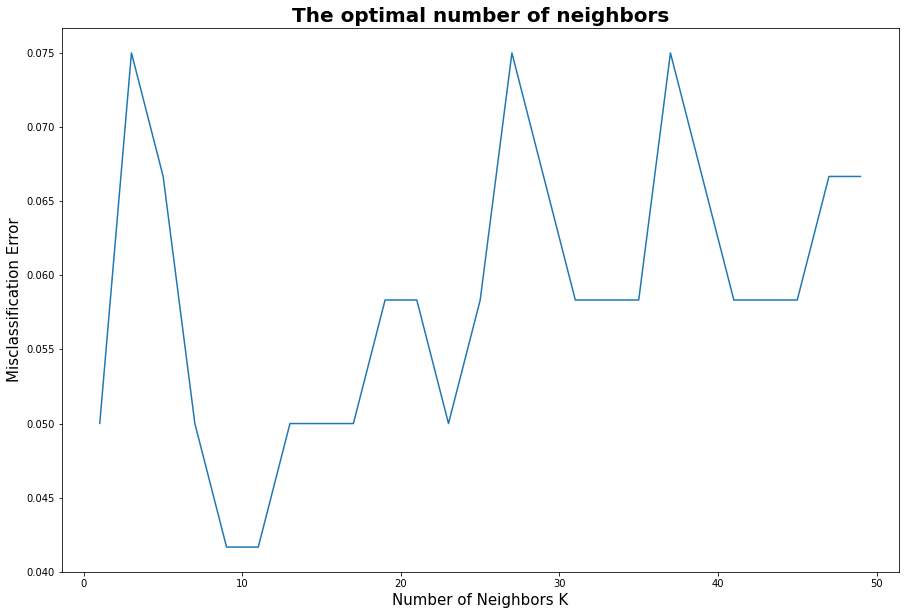

In [46]:
# changing to misclassification error

MSE = [1 - x for x in cv_score]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()


In [48]:
best_k=k_list[MSE.index(min(MSE))]
print("The optimal NUmber of neighbour is %d" % best_k)

The optimal NUmber of neighbour is 9
